<a href="https://colab.research.google.com/github/stevengregori92/Project--Movies-from-time-to-time/blob/main/Project_Movies_Time_to_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- This is the **Capstone Project** where we put it all together
- Ideally, we would look at a real business/organisation problem and turn it into a **Data Science Problem**
- As this can be hard, we will just assume we have a problem that we need to sovle
- This will be done by either making up a problem or looking at some data that interests you and make up a question.

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

#### Sample project:
An online media wants to write an article on the trend of movies ratings over the time. They want to explore what is the overall trend and are there different trends in different genres.
- They ask you to make some charts showing trends

### Step 1.b: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Import Data


In [ ]:
movies = pd.read_parquet('movies.parquet')
movies.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,None,None,None,NaN,1.0,2.0


In [ ]:
names = pd.read_parquet('names.parquet')
names.head(1)

,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_name_id,,,,,,,,,,,,,,,,
nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2


In [ ]:
ratings = pd.read_parquet('ratings.parquet')
ratings.head(1)

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0


In [ ]:
title_principals = pd.read_parquet('title_principals.parquet')
title_principals.head(1)

,ordering,imdb_name_id,category,job,characters
imdb_title_id,,,,,
tt0000009,1,nm0063086,actress,None,"[""Miss Geraldine Holbrook (Miss Jerry)""]"


### Step 1.e: Combine data


In [ ]:
combined_data = movies.join(title_principals).join(names, on = 'imdb_title_id')
combined_data.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

In [ ]:
movies.shape

(85855, 21)

In [ ]:
movies.dtypes

title                     object
original_title            object
year                       int16
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85855 entries, tt0000009 to tt9914942
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  85855 non-null  object 
 1   original_title         85855 non-null  object 
 2   year                   85855 non-null  int16  
 3   date_published         85855 non-null  object 
 4   genre                  85855 non-null  object 
 5   duration               85855 non-null  int64  
 6   country                85791 non-null  object 
 7   language               85022 non-null  object 
 8   director               85768 non-null  object 
 9   writer                 84283 non-null  object 
 10  production_company     81400 non-null  object 
 11  actors                 85786 non-null  object 
 12  description            83740 non-null  object 
 13  avg_vote               85855 non-null  float64
 14  votes                  85855 non-null  int64  


### Step 2.b: Groupby, Counts and Statistics


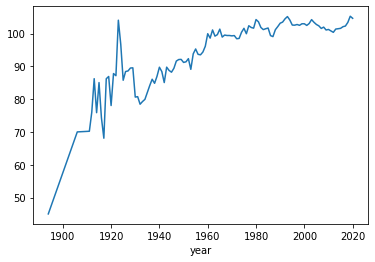

In [ ]:
movies.groupby('year').mean()['duration'].plot()

In [ ]:
movies.explode('genre').groupby('genre').mean().sort_values('avg_vote', ascending = False).head(20)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
genre,,,,,,,
"Musical, Comedy, Family",2001.000000,184.000000,8.700000,3560.0,NaN,11.000000,1.0
"Music, Musical",1974.000000,78.000000,8.500000,692.0,NaN,2.000000,NaN
"Family, Sci-Fi, Adventure",1991.000000,140.000000,8.400000,2223.0,NaN,3.000000,2.0
"Fantasy, Musical, Sci-Fi",2011.000000,172.000000,8.100000,626.0,NaN,1.000000,NaN
"Animation, Fantasy, Mystery",2012.000000,109.000000,8.000000,1203.0,NaN,2.000000,2.0
"Biography, History, Musical",1997.000000,150.000000,8.000000,1669.0,NaN,4.000000,NaN
"Fantasy, Musical, Mystery",1958.000000,110.000000,8.000000,1168.0,NaN,12.000000,5.0
"Fantasy, Drama, Romance",1950.000000,112.000000,8.000000,10117.0,NaN,58.000000,71.0
"Family, Musical, Comedy",1996.000000,105.000000,7.900000,388.0,NaN,2.000000,1.0


In [ ]:
data = movies.copy()
data['genre'] = data['genre'].str.split(',')
data = data.explode('genre')
data['genre'] = data['genre'].str.strip()
data.groupby('genre').mean().sort_values('avg_vote', ascending = False)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
genre,,,,,,,
Documentary,2000.000000,88.500000,7.300000,615.500000,NaN,9.000000,11.500000
Film-Noir,1949.162896,84.914027,6.644042,4225.921569,85.850000,43.099548,22.134351
Biography,1995.385780,114.011359,6.624022,21785.734960,61.814039,82.587873,55.304991
History,1988.932927,117.136324,6.543380,10485.186411,62.667453,51.372017,32.220408
War,1978.499554,106.447368,6.427520,7809.108385,62.857639,39.798751,21.807388
News,2015.000000,82.000000,6.400000,105.000000,NaN,3.000000,3.000000
Animation,2003.114900,87.396077,6.381317,22022.711350,62.020877,62.892857,41.654872
Musical,1972.161685,109.175404,6.247379,3877.038217,60.172222,32.066204,14.631133
Music,1987.566015,100.198934,6.243635,8982.579041,57.658257,48.440123,31.753766


### Step 2.c: Visualize data

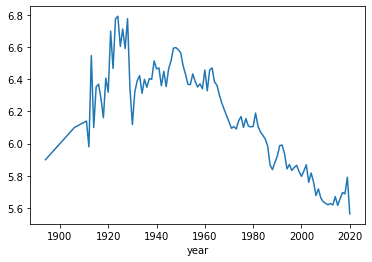

In [ ]:
movies.groupby('year').mean()['avg_vote'].plot()

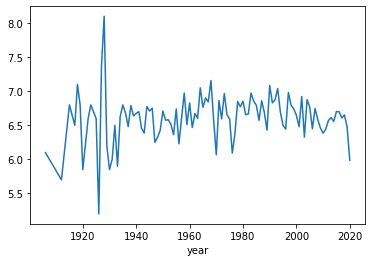

In [ ]:
data[data['genre'] == 'Biography'].groupby('year').mean()['avg_vote'].plot()

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

In [1]:
all_df = movies.groupby('year').mean()
bio_df = data[data['genre'] == 'Biography'].groupby('year').mean()

X_all = pd.DataFrame(all_df.index)
y_all = all_df['avg_vote']

X_bio = pd.DataFrame(bio_df.index)
y_bio = bio_df['avg_vote']

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_all = LinearRegression()
lin_all.fit(X_all, y_all)

lin_bio = LinearRegression()
lin_bio.fit(X_bio, y_bio)

lin_doc = LinearRegression()
lin_doc.fit(X_doc, y_doc)

LinearRegression()

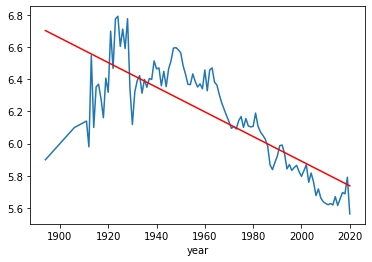

In [ ]:
ax = all_df['avg_vote'].plot()
ax.plot(all_df.index, lin_all.predict(X_all), c = 'r')

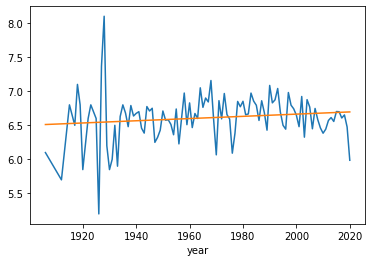

In [ ]:
bx = bio_df['avg_vote'].plot()
bx.plot(bio_df.index, lin_bio.predict(X_bio))

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4: Visualize Results


Text(0.5, 1.0, 'Trend of movie rating')

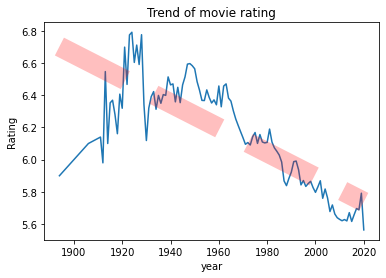

In [ ]:
ax = all_df['avg_vote'].plot()
ax.plot(all_df.index, lin_all.predict(X_all), c = 'r', alpha = .25, linewidth = 20, linestyle = "--")
ax.set_ylabel('Rating')
ax.set_title('Trend of movie rating')

Text(0.5, 1.0, 'Trend of biographies rating')

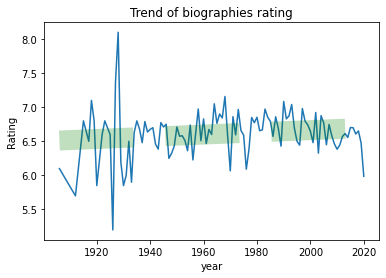

In [ ]:
bx = bio_df['avg_vote'].plot()
bx.plot(bio_df.index, lin_bio.predict(X_bio), c = 'g', alpha = .25, linewidth = 20, linestyle = "--")
bx.set_ylabel('Rating')
bx.set_title('Trend of biographies rating')

### Step 4: Credibility Counts
- This is the check point if your research is valid
    - Are you hiding findings you did not like (not supporting your hypothesis)?
    - Remember it is the long-term relationship that counts
- Don't leave out results
    - We learn from data and find hidden patterns, to make data-driven decisions, with a long-term perspective

In [ ]:
# Movies is getting worse in decades
#    - The more decades, the more movie are made
#    - The more decades, more people give bad movies rate

# Biography is getting better in decades 
#     - The more decades, the more biography genre are made
#     - The more decades, more people give better biography ratings

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Use Insights
- How do we follow up on the presented **Insights**?
- **No one-size-fits-all**: It depends on the **Insights** and **Problem**
- *Examples:*
    1. **Problem**: What customers are most likely to cancel subscription?
        - Say, we have insufficient knowledge of customers, and need to get more, hence we have given recommendations to gather more insights
        - But you should still try to add value
    2. **Problem**: Here is our data - find valuable insights!
        - This is a challenge as there is no given focus
        - An iterative process involving the customer can leave you with no surprises

In [ ]:
# Insights
#   - Movies are getting worse
#   - Biography genre are getting better
#   - More movies are produced
#   - More votes in every movies

# For end user / customers
#   - Is it for publicate premium information or click bait media ?
#   - This will affect to people recommendation